In [53]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
import numpy as np


In [ ]:


data = pd.read_csv('traindata.csv')
data = data.drop(['id','price','date', 'price/sqft', 'rootprice/sqft'], axis=1)
X_train = data.drop(['log price'], axis=1)
y_train = data['log price']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [36]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  0.03261539087442806


In [37]:
model_params = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(estimator=model_params, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)



Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Best score:  0.8870218299424002


In [38]:
grid_search.cv_results_['mean_test_score']

array([0.41890376, 0.58603404, 0.66671414, 0.71446623, 0.74416486,
       0.56932325, 0.71344514, 0.77658016, 0.81011874, 0.82981681,
       0.64028479, 0.78025762, 0.82907096, 0.85011531, 0.86068268,
       0.68375602, 0.81780043, 0.85607997, 0.87014767, 0.87717178,
       0.71185232, 0.83913561, 0.8717228 , 0.8822109 , 0.88702183,
       0.0595557 , 0.11405791, 0.16357039, 0.20870688, 0.2498011 ,
       0.10367686, 0.18941452, 0.26312824, 0.32629077, 0.38037841,
       0.12077991, 0.22198022, 0.3072733 , 0.37853349, 0.43885011,
       0.12991901, 0.23908897, 0.3309606 , 0.40793716, 0.47227386,
       0.13767878, 0.25272712, 0.34863293, 0.42866813, 0.49587143,
       0.00553815, 0.01185075, 0.01798269, 0.02406401, 0.03011629,
       0.01045403, 0.02157961, 0.03248824, 0.04320019, 0.05373741,
       0.01221548, 0.02512491, 0.03779412, 0.05022912, 0.06242837,
       0.01320287, 0.02707903, 0.04071281, 0.0541084 , 0.0672445 ,
       0.01407554, 0.028786  , 0.04321473, 0.05737752, 0.07128

In [40]:
model_best_params = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [grid_search.best_params_['n_estimators']],
    'learning_rate': [grid_search.best_params_['learning_rate']],
    'max_depth': [grid_search.best_params_['max_depth']]
}

grid_search_best = GridSearchCV(estimator=model_params, param_grid=param_grid)
grid_search_best.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Best score:  0.8870218299424002


In [56]:
feature_importances = model.feature_importances_
feature_names = data.columns.to_list()
index = feature_names.index('log price')
feature_names.pop(index)
np.delete(feature_importances,index)
print(len(feature_importances))
len(feature_names)

21


21

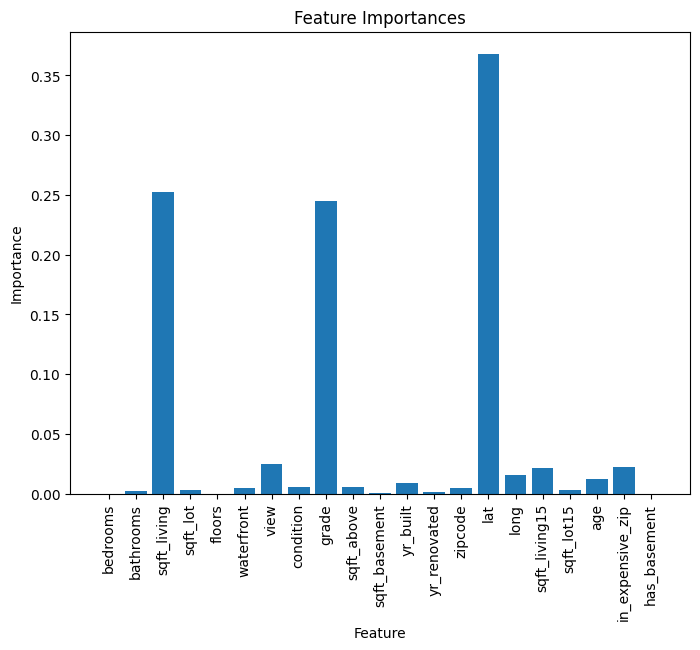

In [57]:
feature_df = pd.DataFrame()
feature_df['importance'] = feature_importances
feature_df['feature'] = feature_names

plt.figure(figsize=(8, 6))
plt.bar(feature_df['feature'], feature_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [103]:
boston_data = pd.read_csv('housing_boston.csv')
# california_data = california_data[['longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'median_house_value']]
# california_data = california_data.rename(columns={'longitude': 'long', 'latitude': 'lat', 'housing_median_age': 'age', 'total_bedrooms': 'bedrooms', 'median_house_value': 'price'})
# california_data['log price'] = california_data['price'].apply(lambda x: np.log(x))

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: bedrooms, Length: 20640, dtype: float64

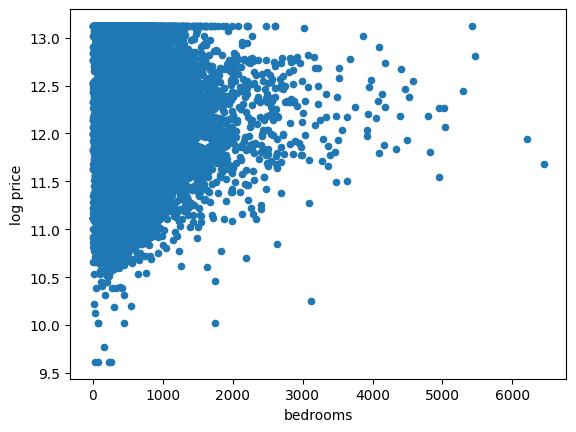

In [102]:
california_data_copy = california_data.copy()
california_data_copy['bedrooms'].fillna(0)
california_data_copy.plot(kind = 'scatter',x = 'bedrooms',y = 'log price')
california_data_copy['bedrooms']

In [92]:
X_train_cali = california_data.drop(['log price'], axis=1)
y_train_cali = california_data['log price']

X_train_cal, X_test_cal, y_train_cal, y_test_cal = train_test_split(X_train_cali, y_train_cali, test_size=0.2, random_state=42)

In [96]:
X_test_cal.isnull().sum()

long          0
lat           0
age           0
bedrooms    207
price         0
dtype: int64

In [94]:
model_cali = GradientBoostingRegressor()
model_cali.fit(X_train_cal, y_train_cal)
y_pred = model_cali.predict(X_test_cal)


ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
model = AdaBoostRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)